In [1]:
import warnings
warnings.filterwarnings("ignore")
from lale.lib.lale import ConcatFeatures
from lale.lib.sklearn import LogisticRegression
from lale.lib.sklearn import Nystroem
from lale.lib.sklearn import PCA

In [2]:
pca = PCA(n_components=3)
nys = Nystroem(n_components=10)
concat = ConcatFeatures()
lr = LogisticRegression(random_state=42, C=0.1)

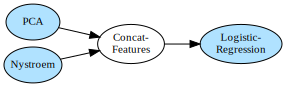

```python
from lale.lib.sklearn import PCA
from lale.lib.sklearn import Nystroem
from lale.lib.lale import ConcatFeatures
from lale.lib.sklearn import LogisticRegression
pca = PCA(n_components=3)
nystroem = Nystroem(n_components=10)
logistic_regression = LogisticRegression(random_state=42, C=0.1)
pipeline = (pca & nystroem) >> ConcatFeatures() >> logistic_regression
```

In [3]:
trainable = (pca & nys) >> concat >> lr
# or equivalently: trainable = make_pipeline(make_union(pca, nys), lr)
trainable.visualize()
trainable.pretty_print(ipython_display=True)

In [4]:
import sklearn.datasets
from lale.helpers import cross_val_score
digits = sklearn.datasets.load_digits()
X, y = sklearn.utils.shuffle(digits.data, digits.target, random_state=42)
cv_results = cross_val_score(trainable, X, y)
cv_results = ['{0:.1%}'.format(score) for score in cv_results]
print("Accuracy scores during cross validation: {}".format(cv_results))

Accuracy scores during cross validation: ['67.0%', '64.1%', '65.7%', '65.5%', '63.4%']


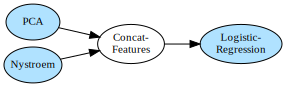

In [5]:
from lale.operators import make_union
from lale.operators import make_pipeline
trainable = make_pipeline(make_union(pca, nys), lr)
trainable.visualize()